In [3]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
N = 100
R = [10,20,30,40,50,60,70,80,90,100]
E = [0,0.2,0.4]

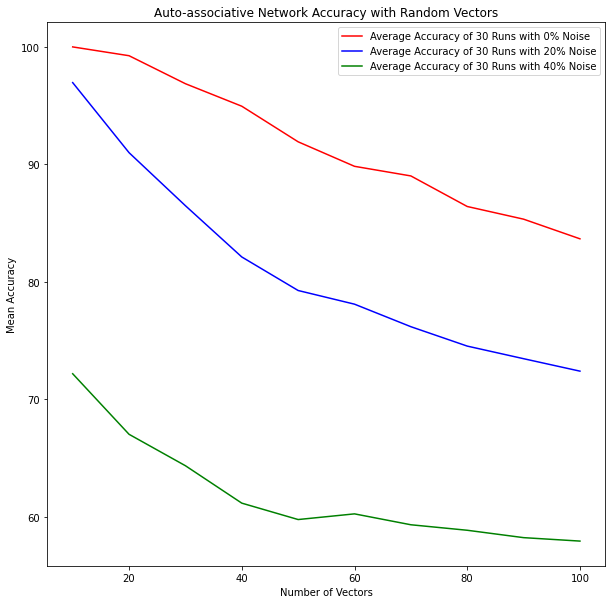

,num,err,acc,std
0,10,0.0,100.000000,0.000000
1,10,0.2,96.960000,3.403293
2,10,0.4,72.172000,11.288862
3,20,0.0,99.250000,0.887412
4,20,0.2,90.995000,4.522497
5,20,0.4,67.016000,9.221700
6,30,0.0,96.866667,1.687865
7,30,0.2,86.479333,4.718500
8,30,0.4,64.340667,8.263854
9,40,0.0,94.950000,2.213030


In [30]:
results = []
for r in R:
    W = np.zeros((N,N))
    s = np.random.choice([1, -1], size=(r, N), p=[0.5, 0.5])
    #train 
    for i in range(r):
        W = np.matmul(s[i][np.newaxis].T,s[i][np.newaxis]) + W
    W = W-np.diag(np.full(N,r))
    #check 
    for err in E:
        epochs=50
        acc=[]
        for e in range(epochs):
            indexes = random.sample(range(len(s.flatten())),int(len(s.flatten())*err))
            s_temp=s.copy().flatten()
            for i in indexes:
                s_temp[i] = s_temp[i] * -1
            s_temp = s_temp.reshape(r,N)
            for j in range(r):
                acc.append((np.sign(np.matmul(s_temp[j],W)) == s[j]).sum())
                # print(acc)
        results.append({
            "num":r,
            "err":err,
            "acc":np.array(acc).mean(),
            "std":np.array(acc).std()
        })
Data = list(pd.DataFrame(results,index=None).groupby("err"))
plt.figure(figsize=(10,10))
plt.plot(Data[0][1].num,Data[0][1].acc,'r',label='Average Accuracy of 30 Runs with 0% Noise')
plt.plot(Data[1][1].num,Data[1][1].acc,'b',label='Average Accuracy of 30 Runs with 20% Noise')
plt.plot(Data[2][1].num,Data[2][1].acc,'g',label='Average Accuracy of 30 Runs with 40% Noise')
plt.legend()
plt.xlabel("Number of Vectors")
plt.ylabel("Mean Accuracy")
plt.title("Auto-associative Network Accuracy with Random Vectors")
plt.show()
pd.DataFrame(results)
